### See both HMM and PSSM for a particular fold

In [5]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

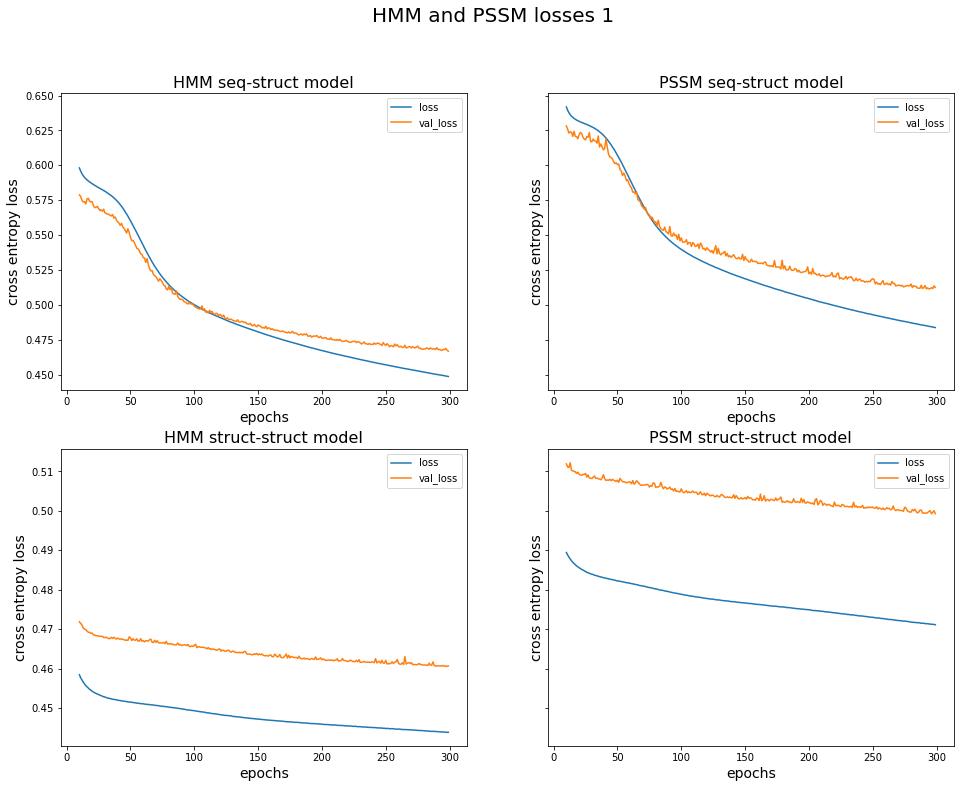

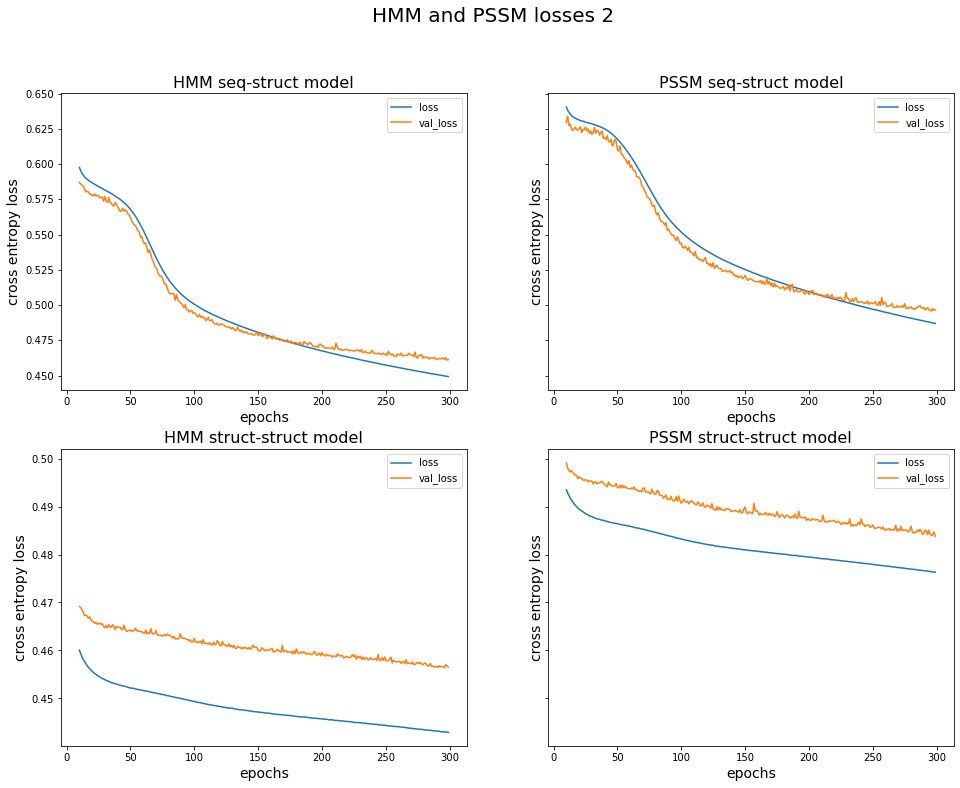

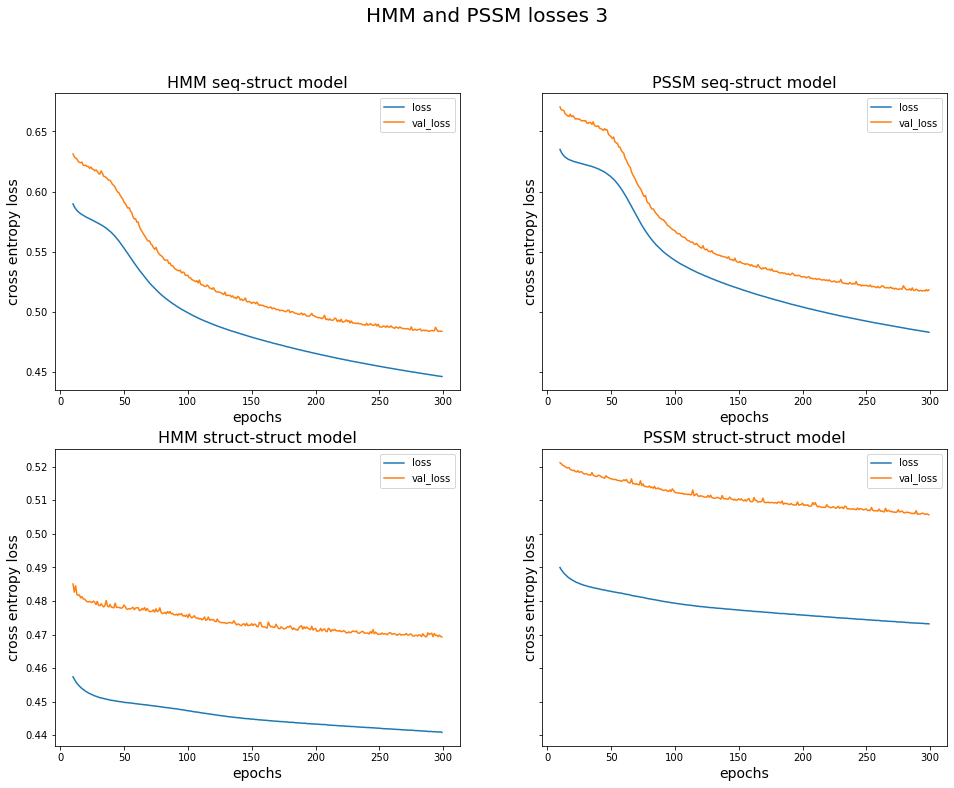

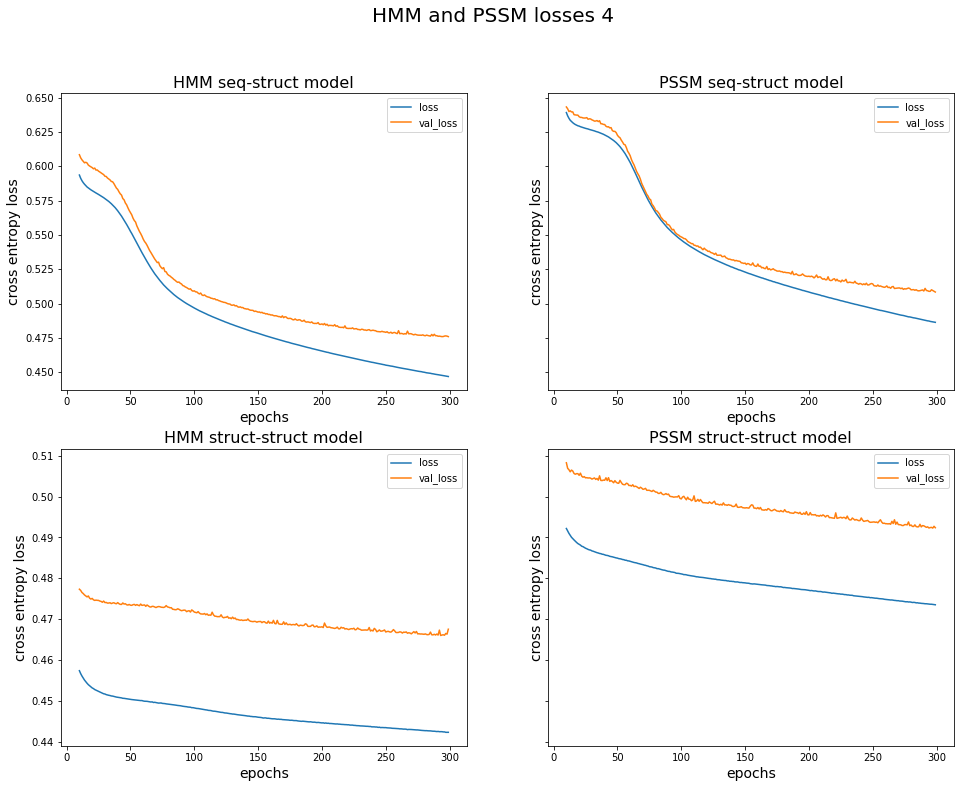

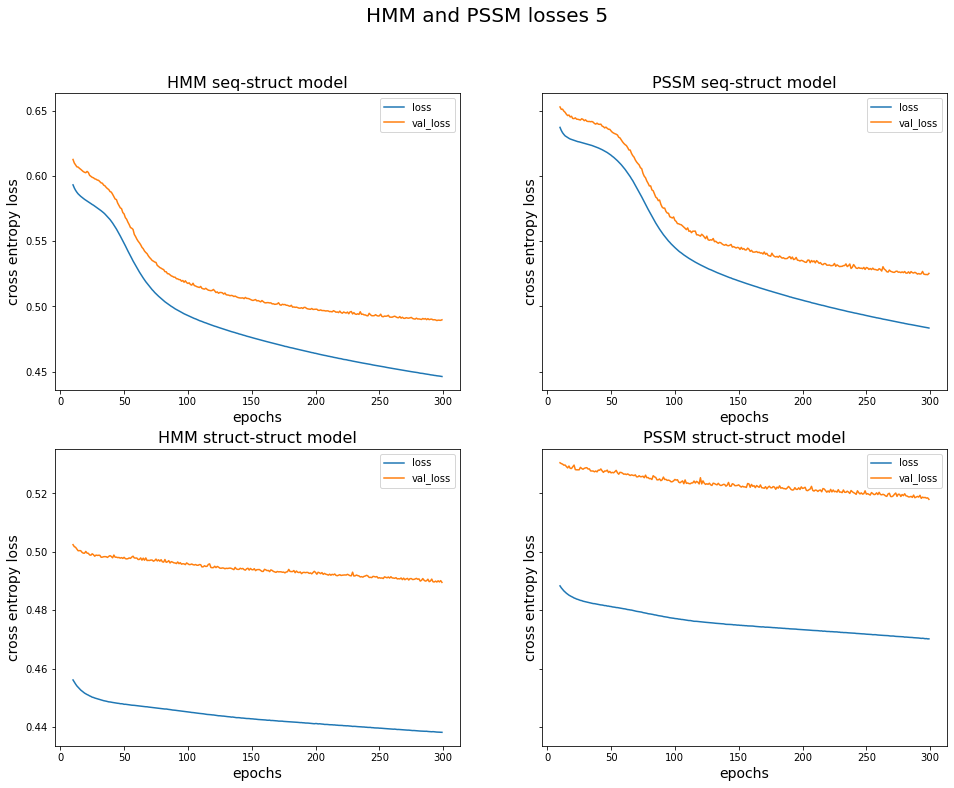

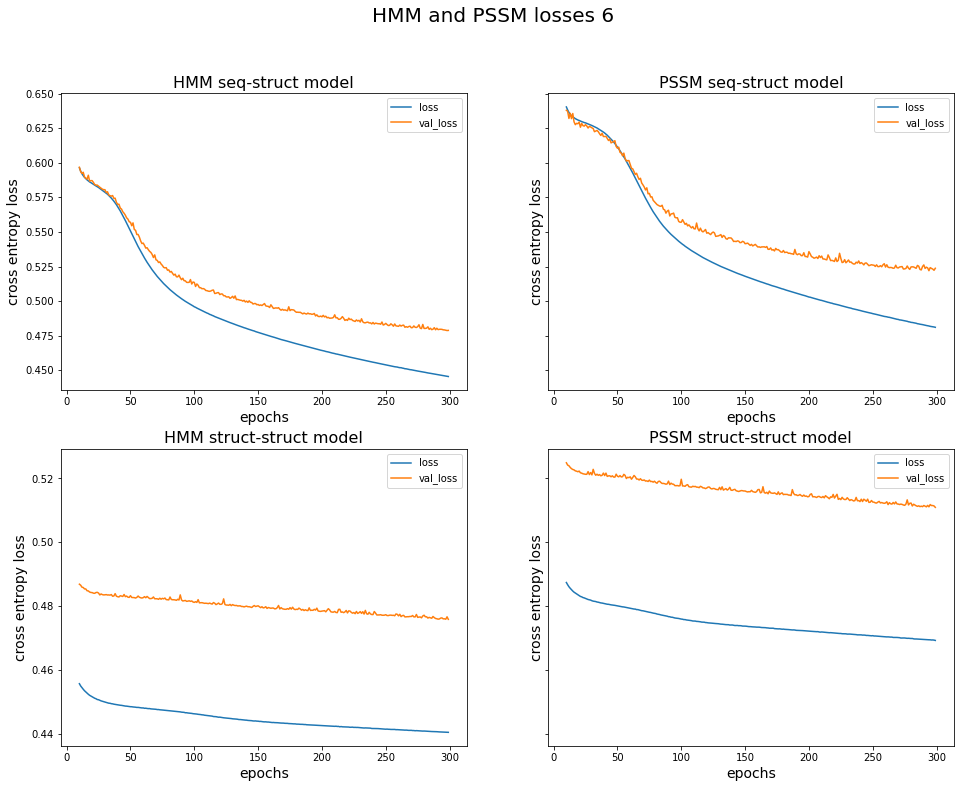

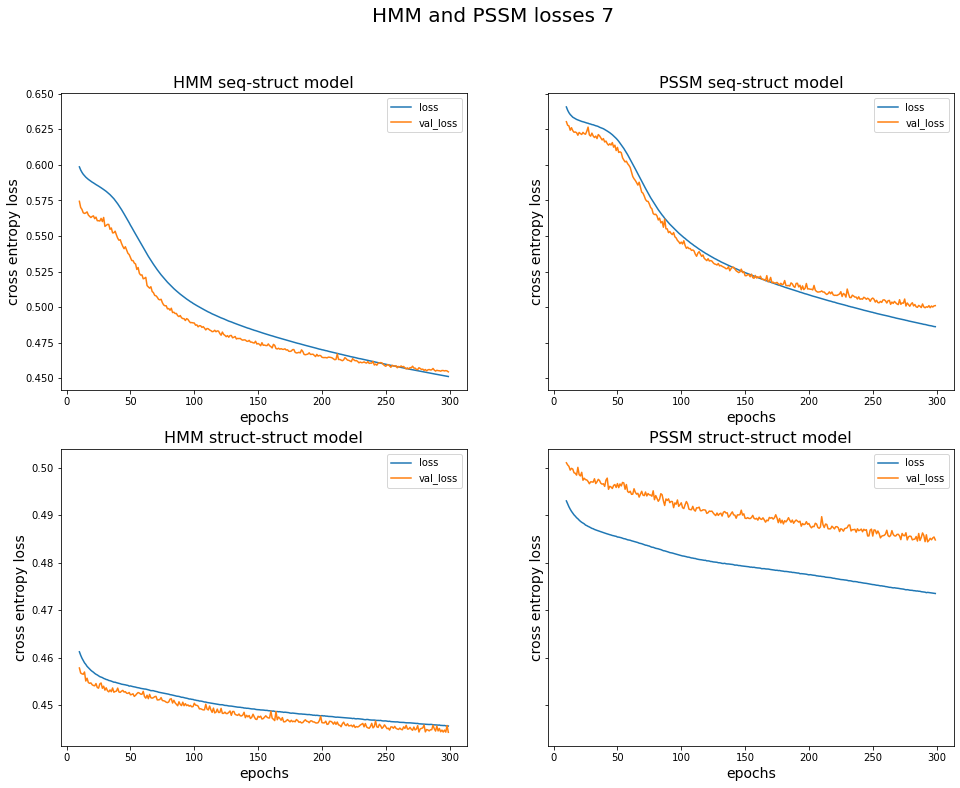

In [16]:
for i in range(1,8):

    # specify i. ranges from 1 to 7 inclusive
    start=10
    end=300
    hmm_results_path = '/cluster/gjb_lab/2472402/outputs/keras_train_CV/HMM/20Aug/cv%d/results.pkl' % i
    pssm_results_path = '/cluster/gjb_lab/2472402/outputs/keras_train_CV/PSSM/20Aug/cv%d/results.pkl' % i
    ((hmmdict1,hmmdict2),_) = pickle.load(open(hmm_results_path, 'rb'))
    ((pssmdict1,pssmdict2),_) = pickle.load(open(pssm_results_path, 'rb'))
    hmm1 = pd.DataFrame(hmmdict1)
    hmm2 = pd.DataFrame(hmmdict2)
    pssm1 = pd.DataFrame(pssmdict1)
    pssm2 = pd.DataFrame(pssmdict2)

    fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(ncols=2,nrows=2,figsize=(16,12),sharey='row')
    fig.suptitle("HMM and PSSM losses %d" % i, fontsize=20)

    for i in range(0,4):
        ax=[ax1,ax3,ax2,ax4][i]
        title=['HMM seq-struct model','HMM struct-struct model','PSSM seq-struct model','PSSM struct-struct model'][i]
        data=[hmm1,hmm2,pssm1,pssm2][i]
        _=ax.plot(data.loc[start:end,['loss','val_loss']])
        _=ax.legend(['loss','val_loss'])
        _=ax.set_ylabel('cross entropy loss',{'fontsize':14})
        _=ax.set_xlabel('epochs',{'fontsize':14})
        _=ax.set_title(title,{'fontsize':16})
